In [2]:

!pip install scikit-learn matplotlib seaborn --quiet

# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [3]:
# Load PIMA Diabetes Dataset directly
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

# Show first 5 rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0


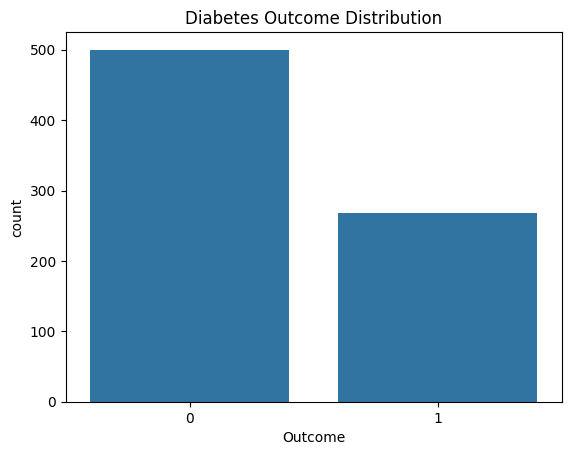

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


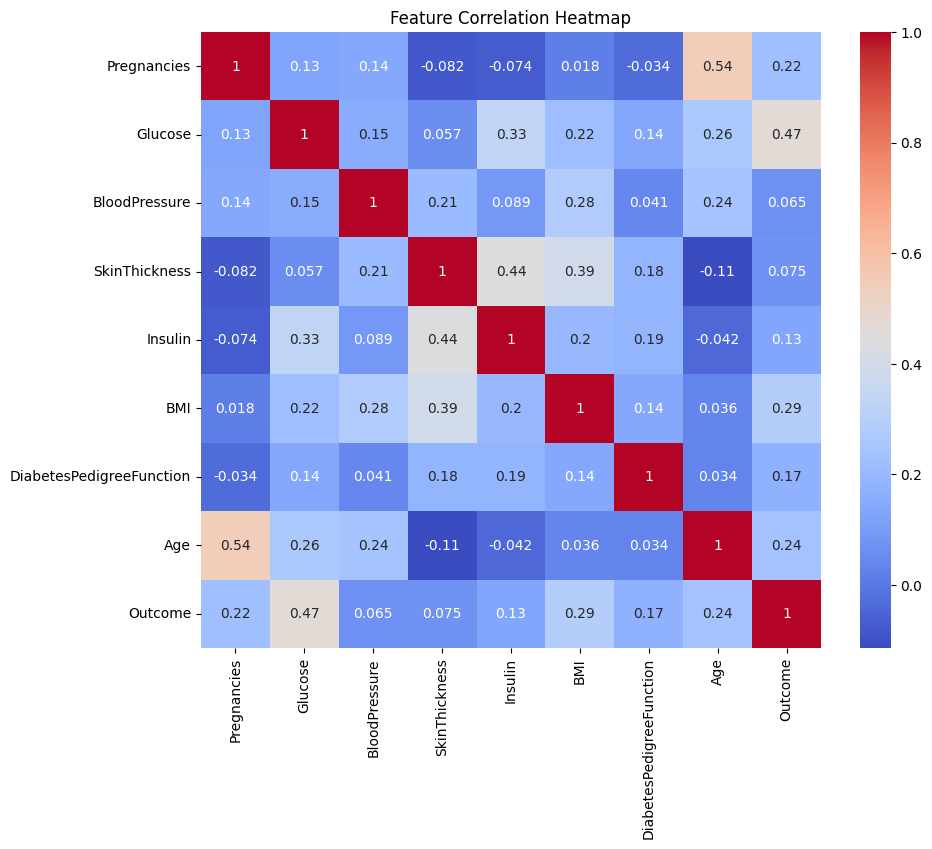

In [4]:
# Basic Info
df.info()

# Check missing values
print(df.isnull().sum())

# Outcome distribution
sns.countplot(x='Outcome', data=df)
plt.title('Diabetes Outcome Distribution')
plt.show()

# Feature correlation with Outcome
correlation = df.corr()['Outcome'].sort_values(ascending=False)
print(correlation)

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [5]:
# Separate X and y
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Feature Selection
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [6]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)


In [7]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)


In [8]:
mlp_model = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=500)
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


--- Gradient Boosting Evaluation ---
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

ROC AUC Score: 0.809366391184573
--- SVM Evaluation ---
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154

ROC AUC Score: 0.8044995408631772
--- Neural Network Evaluation ---
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        99
           1       0.62      0.65      0.64        55

    accuracy         

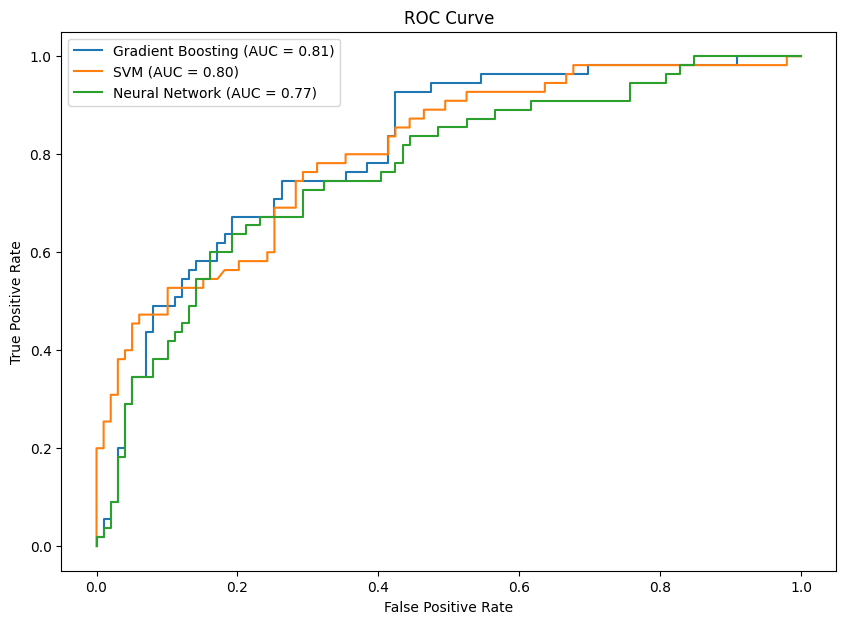

In [9]:
def evaluate(model_name, y_true, y_pred, y_proba):
    print(f"--- {model_name} Evaluation ---")
    print(classification_report(y_true, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_true, y_proba[:,1]))

    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_true, y_proba[:,1]):.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

plt.figure(figsize=(10,7))

evaluate("Gradient Boosting", y_test, gb_pred, gb_model.predict_proba(X_test))
evaluate("SVM", y_test, svm_pred, svm_model.predict_proba(X_test))
evaluate("Neural Network", y_test, mlp_pred, mlp_model.predict_proba(X_test))

plt.show()


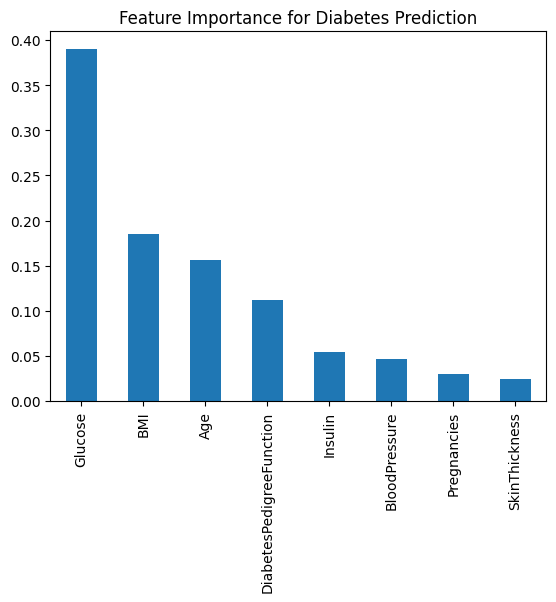

In [10]:
# Example: Feature Importance from Gradient Boosting
feature_importance = pd.Series(gb_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance for Diabetes Prediction')
plt.show()
